<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import sklearn

In [2]:
from google.colab import files
import io
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [51]:
df = pd.read_csv(io.StringIO(uploaded['owid-covid-data.csv'].decode('utf-8')))

In [52]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [53]:
#Dimensões do data frame
df.shape

(74141, 60)

# **Análise descritiva dos dados**

In [54]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,7.094200e+04,70943.000000,70213.000000,6.492600e+04,65069.000000,70213.000000,70419.000000,70420.000000,69695.000000,64416.000000,64559.000000,69695.000000,59527.000000,7306.000000,7306.000000,9570.000000,9570.000000,714.000000,714.000000,1203.000000,1203.000000,3.266700e+04,3.214000e+04,32140.000000,32667.000000,3.828000e+04,38280.000000,35386.000000,34875.000000,1.290500e+04,1.248300e+04,1.057500e+04,1.068100e+04,2.280900e+04,12905.000000,12483.000000,10575.000000,22809.000000,62361.000000,7.348400e+04,69554.000000,65618.000000,65618.000000,65618.000000,66401.000000,45636.000000,65973.000000,68386.000000,51595.000000,50550.000000,33716.000000,59774.000000,69495.000000,66665.000000,2649.000000
mean,7.685564e+05,4288.232003,4301.165229,2.012024e+04,98.902688,91.151381,13608.123088,75.711113,75.888720,298.877602,1.533738,1.413868,1.006272,617.099918,24.515842,2745.235423,158.032057,275.640789,21.843279,1457.002628,92.659555,3.373411e+04,5.007251e+06,324.210666,2.150988,3.262793e+04,2.029877,0.097022,160.379014,2.786809e+07,1.415908e+07,7.373994e+06,5.752054e+05,2.748370e+05,26.438953,17.603828,11.069312,3325.704459,59.167988,1.006739e+08,417.388066,30.257027,8.710934,5.539211,17931.063554,12.660078,257.185129,7.790804,10.680463,32.358065,51.653862,2.948233,73.090566,0.723605,19.845557
std,4.059763e+06,23040.733892,22819.192974,8.963180e+04,445.717886,414.856426,24648.969672,167.081591,150.206105,543.501427,3.824851,2.992689,0.340857,1144.974163,27.358282,6264.884464,213.851545,600.045459,38.806532,3082.089592,165.091087,1.413671e+05,2.369908e+07,750.687909,5.786107,1.287795e+05,4.968928,0.101945,839.049856,1.353398e+08,6.845105e+07,3.116081e+07,2.541426e+06,1.714296e+06,33.118039,19.922909,15.148302,4773.307721,21.057318,4.473102e+08,1998.540229,8.948838,6.213310,4.258992,18160.569442,20.032168,114.215768,4.201785,10.872225,13.747453,32.563839,2.496525,7.699478,0.151433,39.327383
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1583.000000,-63.000000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.689300e+04,0.000000e+00,0.000000,-8.538000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,2.339000,1.114000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.633000e+03,3.000000,9.286000,6.000000e+01,0.000000,0.000000,315.341000,0.381000,1.600000,9.304000,0.000000,0.000000,0.840000,23.000000,3.933500,90.000000,20.035500,7.017500,1.871250,30.358500,7.774000,1.674000e+03,1.589632e+05,15.471750,0.159000,1.702750e+03,0.154000,0.020000,6.900000,1.125320e+05,8.704900e+04,4.403000e+04,3.528000e+03,8.580000e+02,2.600000,2

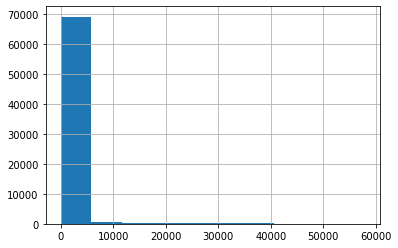

In [55]:
(df['total_cases']/1000).hist()

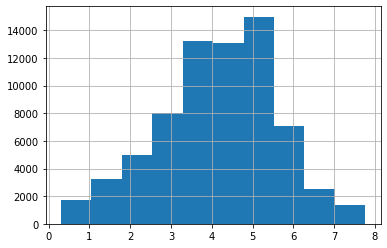

In [56]:
df['log_total_cases'] = df['total_cases'].apply(np.log10)
df[df['log_total_cases'] > 0]['log_total_cases'].hist()

#10^4 é o pico

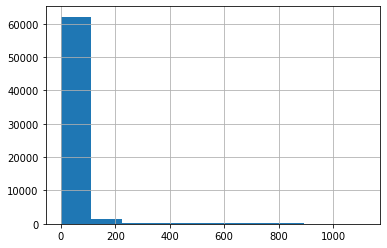

In [57]:
(df['total_deaths']/1000).hist()

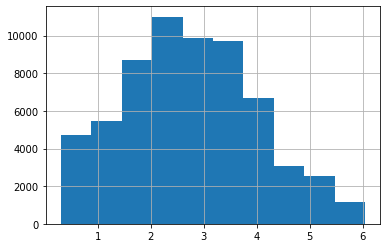

In [58]:
df['log_total_deaths'] = df['total_deaths'].apply(np.log10)
df[df['log_total_deaths'] > 0]['log_total_deaths'].hist()

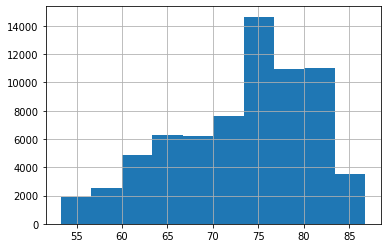

In [59]:
(df['life_expectancy']).hist()

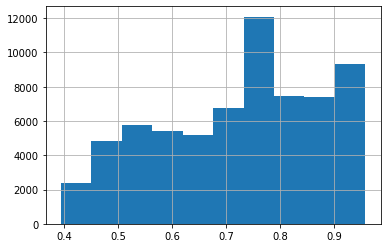

In [60]:
(df['human_development_index']).hist()

In [61]:
df['hdi_category'] = 'NaN'
df.loc[(df['human_development_index'] >= 0.8), 'hdi_category'] = 'Desenvolvido'
df.loc[(df['human_development_index'] >= 0.555) & (df['human_development_index'] < 0.8 ), 'hdi_category'] = 'Em Desenvolvimento'
df.loc[(df['human_development_index'] >= 0.350) & (df['human_development_index'] < 0.555 ), 'hdi_category'] = 'Subdesenvolvido'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido


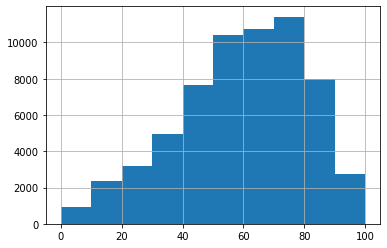

In [62]:
(df['stringency_index']).hist()

In [63]:
df['stringency_index'].describe()

df['stringency_category'] = 'NaN'
df.loc[(df['stringency_index'] >= 74), 'stringency_category'] = 'Alta_estringencia'
df.loc[(df['stringency_index'] >= 60) & (df['stringency_index'] < 74 ), 'stringency_category'] = 'Media_estringencia'
df.loc[(df['stringency_index'] >= 20) & (df['stringency_index'] < 60 ), 'stringency_category'] = 'Baixa_estringencia'
df.loc[(df['stringency_index'] < 20 ), 'stringency_category'] = 'Nenhuma_estringencia'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia


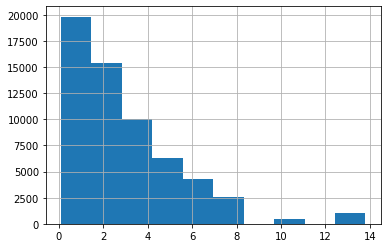

In [64]:
(df['hospital_beds_per_thousand']).hist()

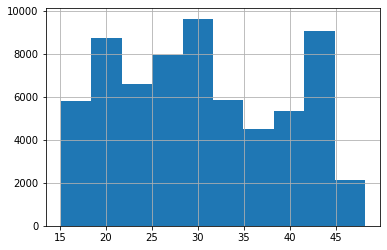

In [65]:
(df['median_age']).hist()

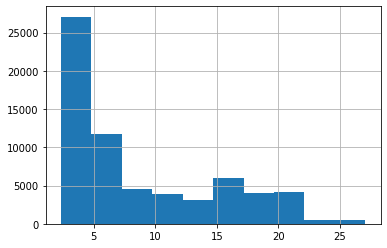

In [66]:
(df['aged_65_older']).hist()

0.25     3.607
0.50     6.211
0.75    13.928
Name: aged_65_older, dtype: float64

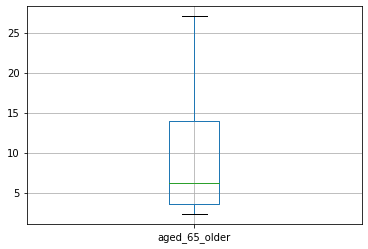

In [67]:
df.boxplot(column=['aged_65_older'])
df['aged_65_older'].quantile([0.25,0.5,0.75])

In [68]:
df['aged_65_older_category'] = 'NaN'
df.loc[(df['aged_65_older'] > 13.928), 'aged_65_older_category'] = 'População com muitíssimos velhos'
df.loc[(df['aged_65_older'] > 6.211) & (df['aged_65_older'] <= 13.928), 'aged_65_older_category'] = 'População com muitos velhos'
df.loc[(df['aged_65_older'] > 3.607) & (df['aged_65_older'] <= 6.211), 'aged_65_older_category'] = 'População com poucos velhos'
df.loc[(df['aged_65_older'] <= 3.607), 'aged_65_older_category'] = 'População com pouquíssimos velhos'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos


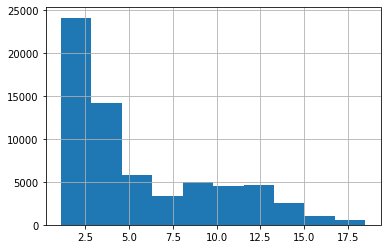

In [69]:
(df['aged_70_older']).hist()

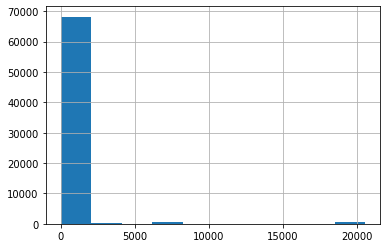

In [70]:
(df['population_density']).hist()

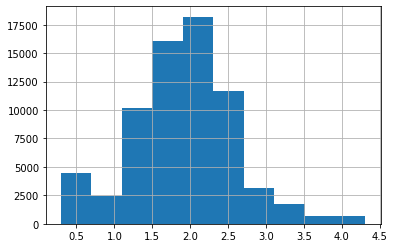

In [71]:
df['log_population_density'] = df['population_density'].apply(np.log10)
df[df['log_population_density'] > 0]['log_population_density'].hist()

In [72]:
df['density_category'] = 'NaN'
df.loc[(df['population_density'] > 500), 'density_category'] = 'Altamente Povoado'
df.loc[(df['population_density'] >= 101) & (df['population_density'] <= 500 ), 'density_category'] = 'Muito Povoado'
df.loc[(df['population_density'] >= 41) & (df['population_density'] <= 100 ), 'density_category'] = 'Povoado'
df.loc[(df['population_density'] >= 11) & (df['population_density'] <= 40 ), 'density_category'] = 'Pouco Povoado'
df.loc[(df['population_density'] >= 2) & (df['population_density'] <= 10 ), 'density_category'] = 'Pouquíssimo  Povoado'
df.loc[(df['population_density'] < 2), 'density_category'] = 'Não Povoado'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado


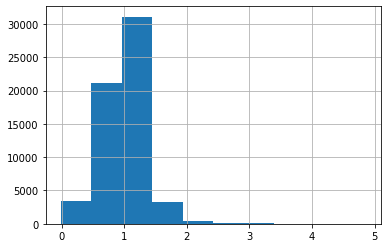

In [73]:
(df['reproduction_rate']).hist()

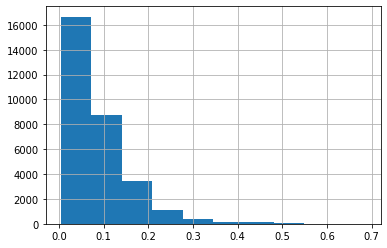

In [74]:
df['log_reproduction_rate'] = df['reproduction_rate'].apply(np.log10)
df[df['log_reproduction_rate'] > 0]['log_reproduction_rate'].hist()

## Estatísticas univariadas

In [26]:
print('Mean: ')
print(df[df['location'] == 'Brazil']['total_cases'].mean())

print('Median: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

print('Mode: ')
print(df[df['location'] == 'Brazil']['total_cases'].mode())

Mean: 
6866582.305555556
Median: 
5578037.0
Mode: 
0    2.0
dtype: float64


In [27]:
def est_univ(col_base, val_col_base, col_exp):
  print('Mean: ')
  print(df[df[col_base] == val_col_base][col_exp].mean())

  print('')

  print('Median: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Mode: ')
  print(df[df[col_base] == val_col_base][col_exp].mode())

  print('')

  print('Variance: ')
  print(df[df[col_base] == val_col_base][col_exp].var())

  print('')

  print('STD: ')
  print(df[df[col_base] == val_col_base][col_exp].std())

  print('')

  print('Describe: ')
  print(df[df[col_base] == val_col_base][col_exp].describe())

In [28]:
est_univ('continent', 'South America', 'total_cases')

Mean: 
1306204.443301275

Median: 
260059.0

Mode: 
0    1.0
dtype: float64

Variance: 
8481236338601.818

STD: 
2912256.2281849133

Describe: 
count    4.471000e+03
mean     1.306204e+06
std      2.912256e+06
min      1.000000e+00
25%      1.867250e+04
50%      2.600590e+05
75%      1.174813e+06
max      1.915199e+07
Name: total_cases, dtype: float64


In [29]:
# Intervalo interquartil
def IQR(df, column):
  return df[column].describe()[6] - df[column].describe()[4]

In [30]:
IQR(df, 'total_cases')

145890.25

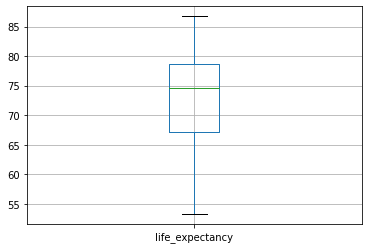

In [31]:
df.boxplot(column=['life_expectancy'])

In [ ]:
df[df['continent']=='South America'].groupby(['location']).agg(['mean','median'])['total_cases']

,mean,median
location,,
Argentina,1.393110e+06,1228814.0
Bolivia,1.631326e+05,142664.0
Brazil,6.842158e+06,5566049.0
Chile,5.917152e+05,512502.0
Colombia,1.396592e+06,1140167.0
Ecuador,1.893185e+05,171783.0
Falkland Islands,NaN,NaN
Guyana,5.958758e+03,4574.0
Paraguay,1.137562e+05,67768.5


In [ ]:
def compare_mean_median_continent(continent_name, label):
  return df[df['continent']== continent_name].groupby(['location']).agg(['mean','median'])[label]

In [ ]:
compare_mean_median_continent('Asia', 'total_cases')

,mean,median
location,,
Afghanistan,4.263653e+04,41633.0
Armenia,1.050265e+05,99563.0
Azerbaijan,1.345320e+05,60873.0
Bahrain,8.983119e+04,82133.0
Bangladesh,4.066480e+05,421079.5
Bhutan,5.697024e+02,359.0
Brunei,1.678595e+02,148.0
Cambodia,5.439681e+03,285.0
China,8.341227e+04,85711.5


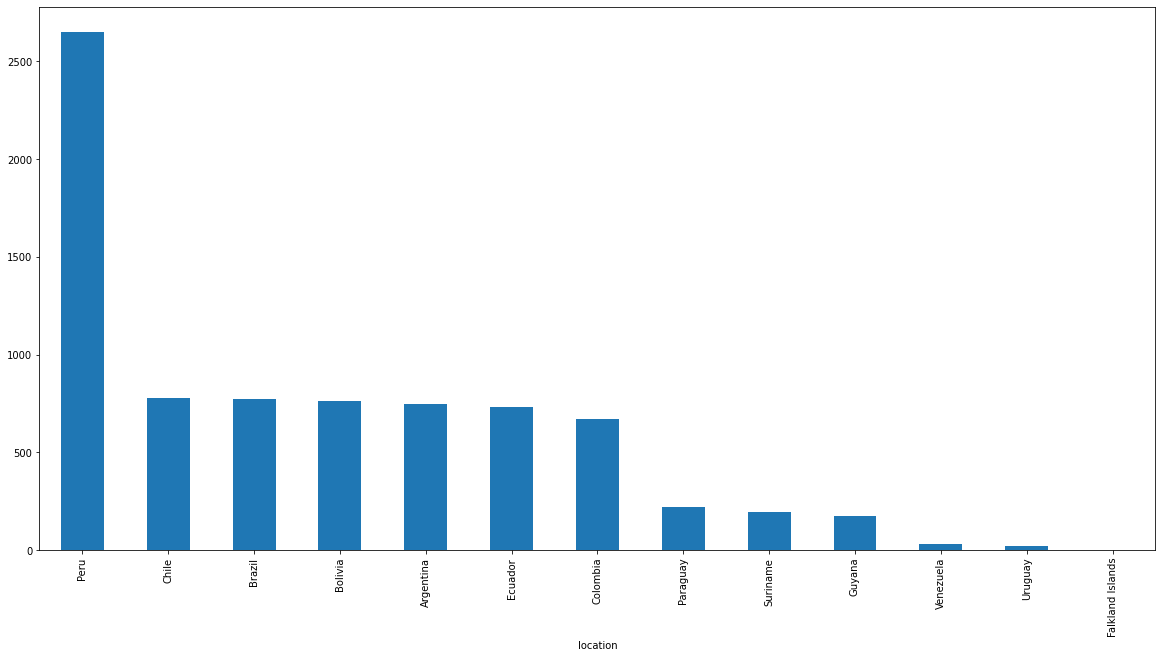

In [ ]:
# Medianas

df[df['continent']=='South America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

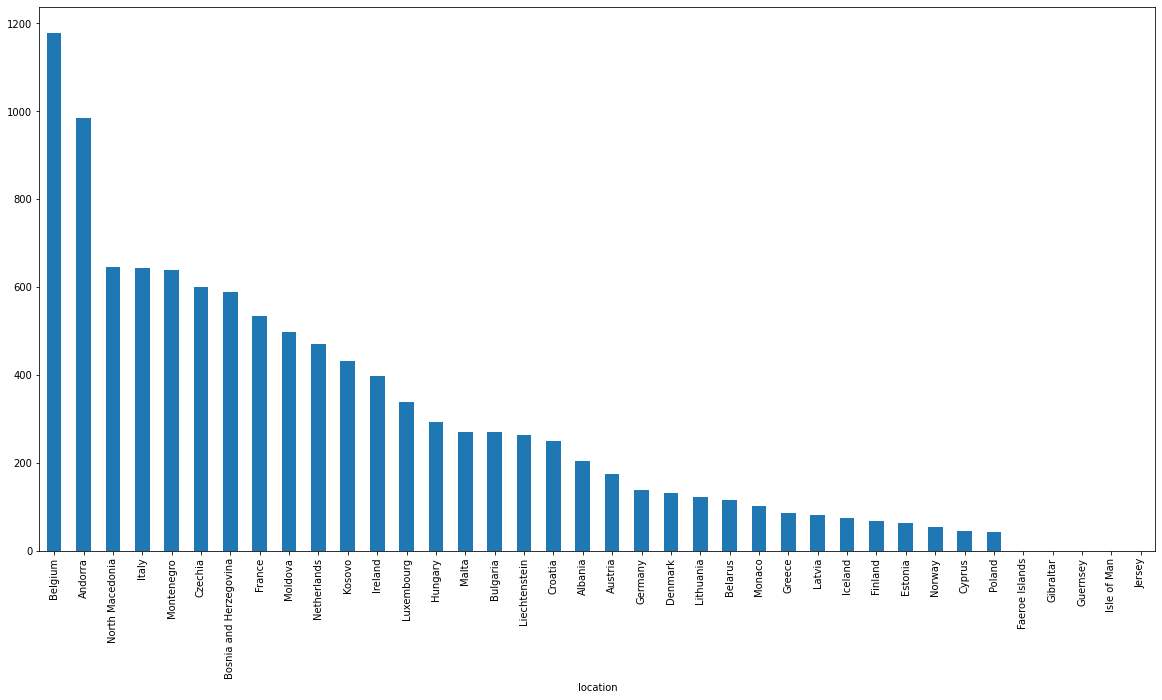

In [76]:
df[df['continent']=='Europe'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

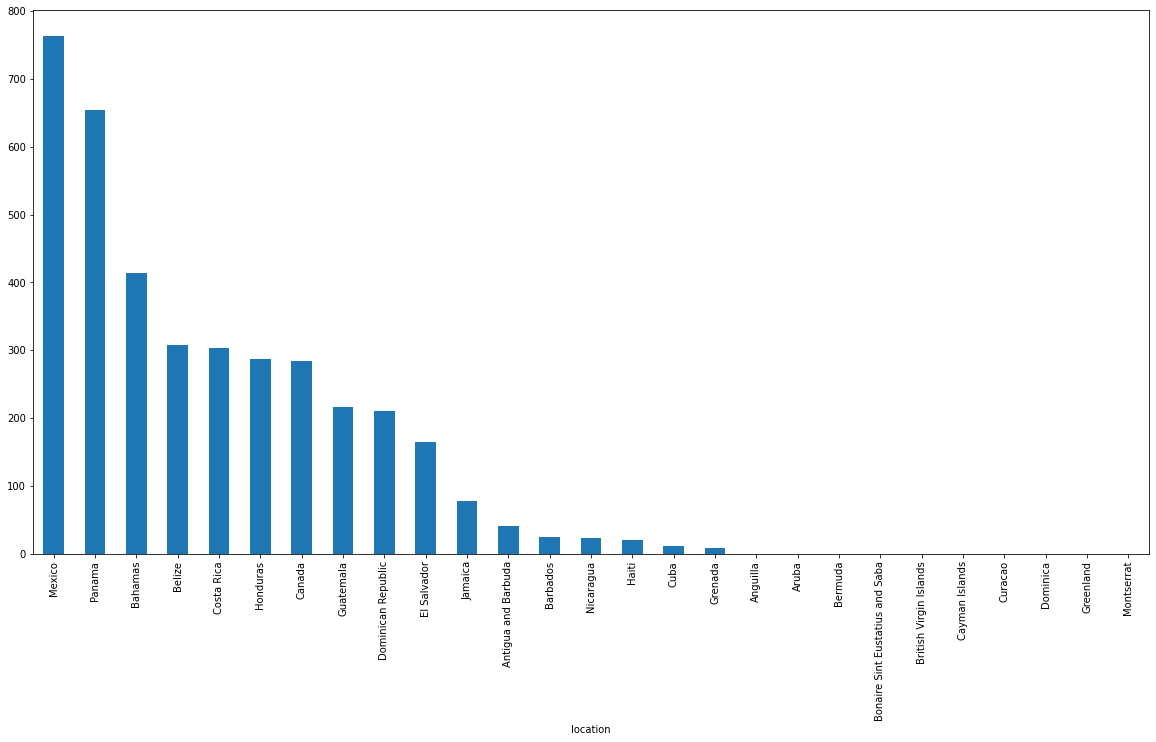

In [77]:
df[df['continent']=='North America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

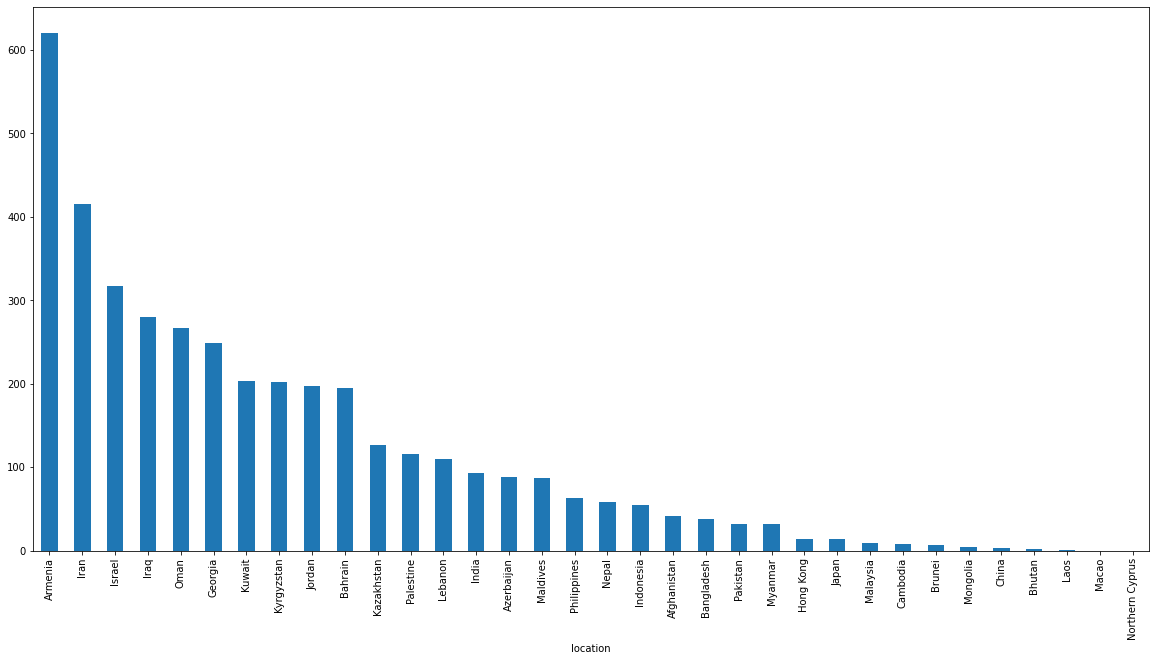

In [78]:
df[df['continent']=='Asia'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

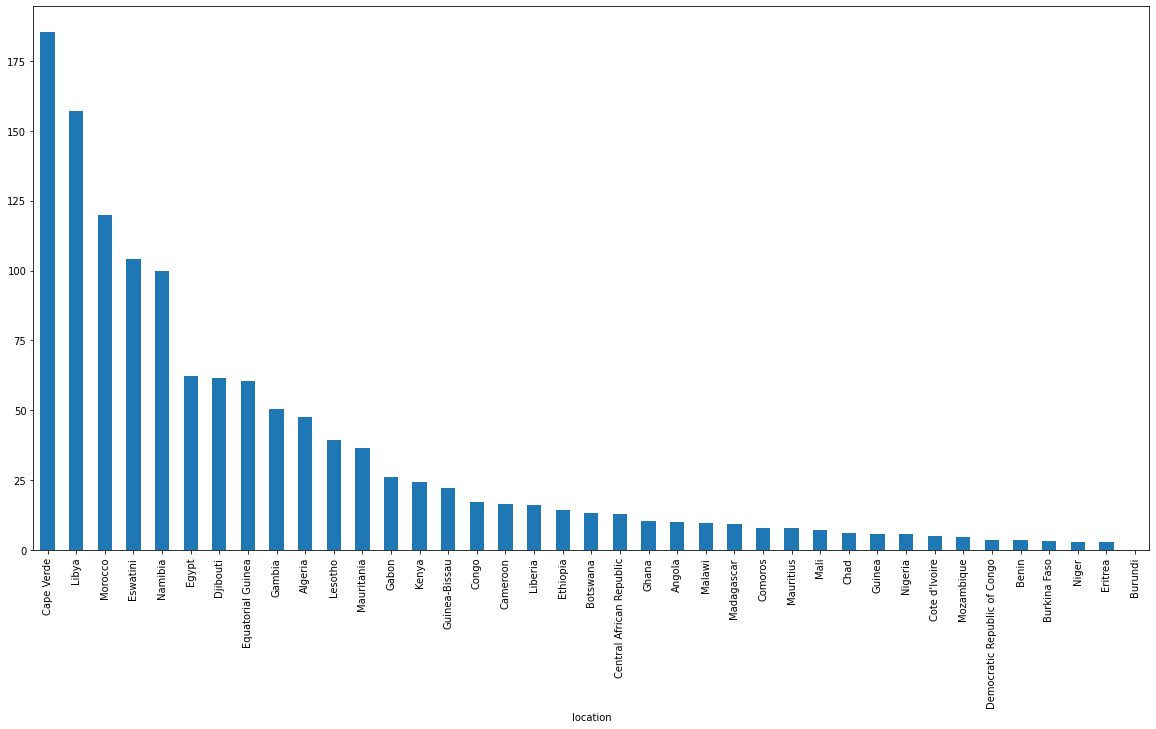

In [79]:
df[df['continent']=='Africa'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

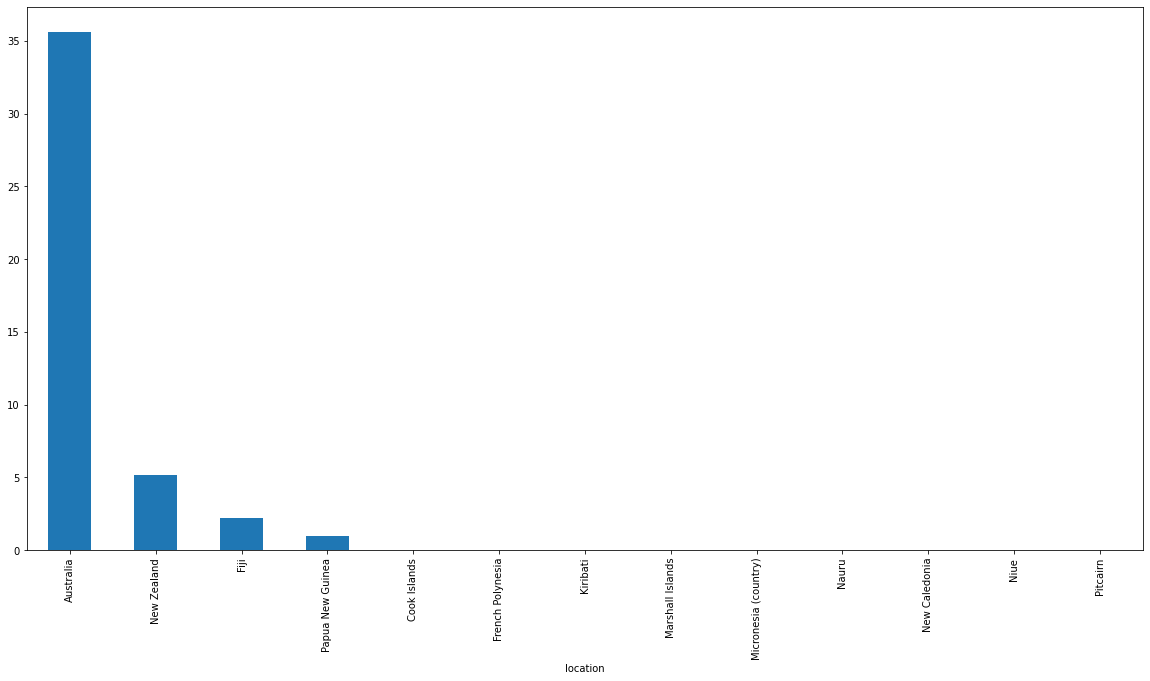

In [80]:
df[df['continent']=='Oceania'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

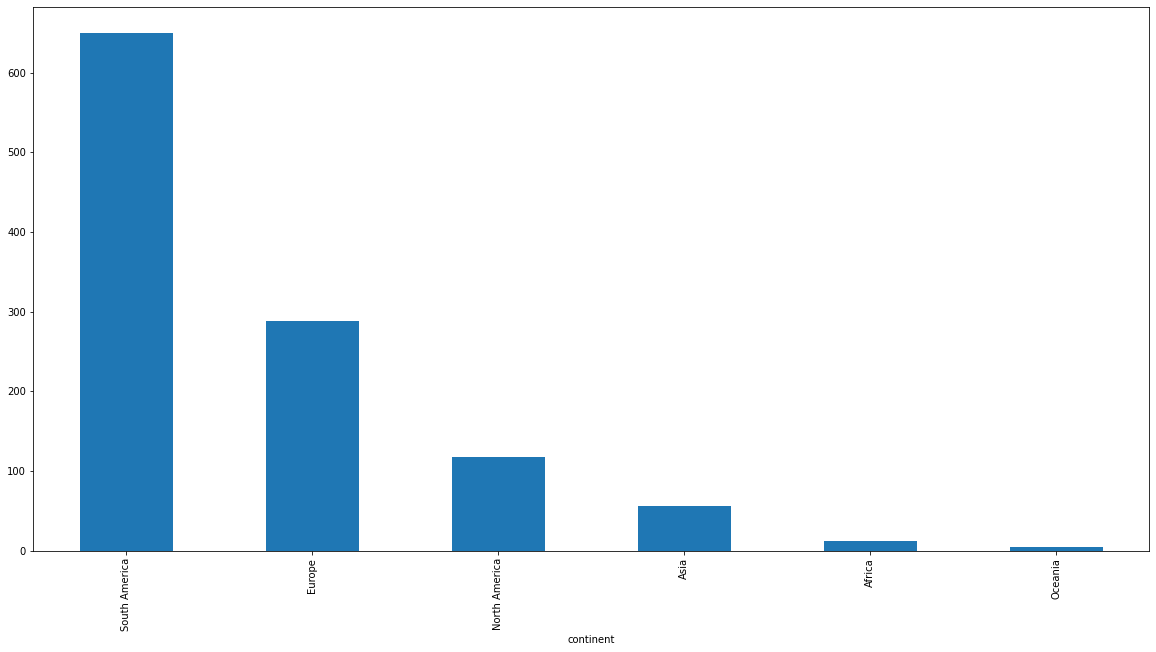

In [34]:
df.groupby(['continent'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

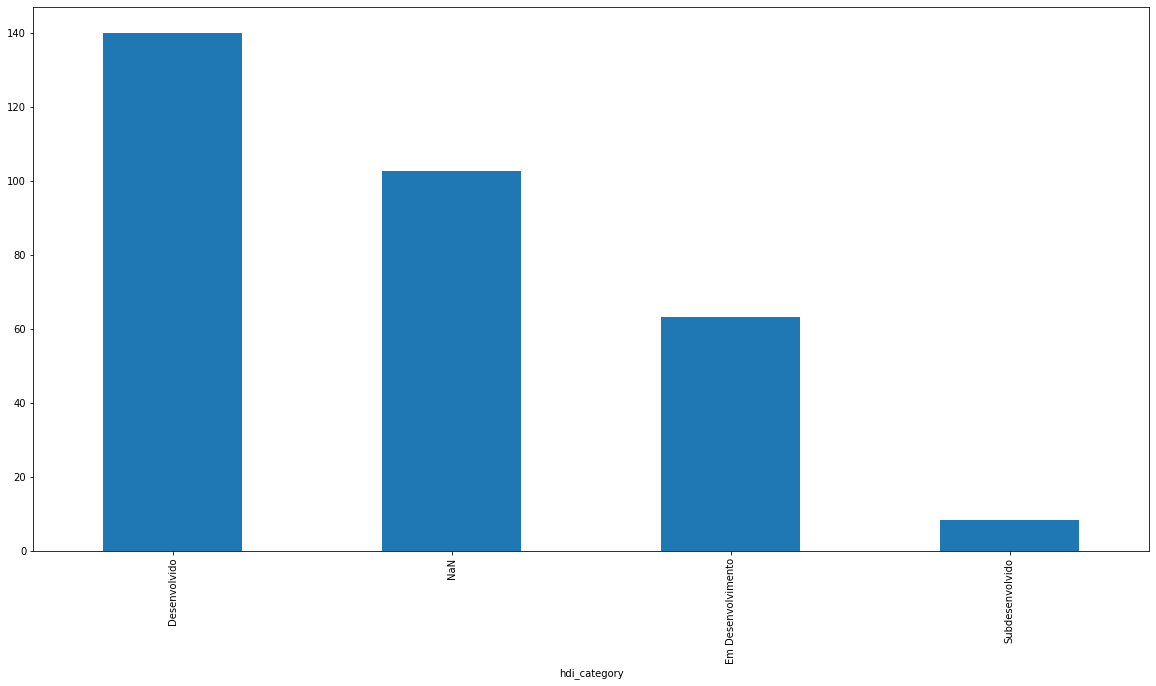

In [35]:
df.groupby(['hdi_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

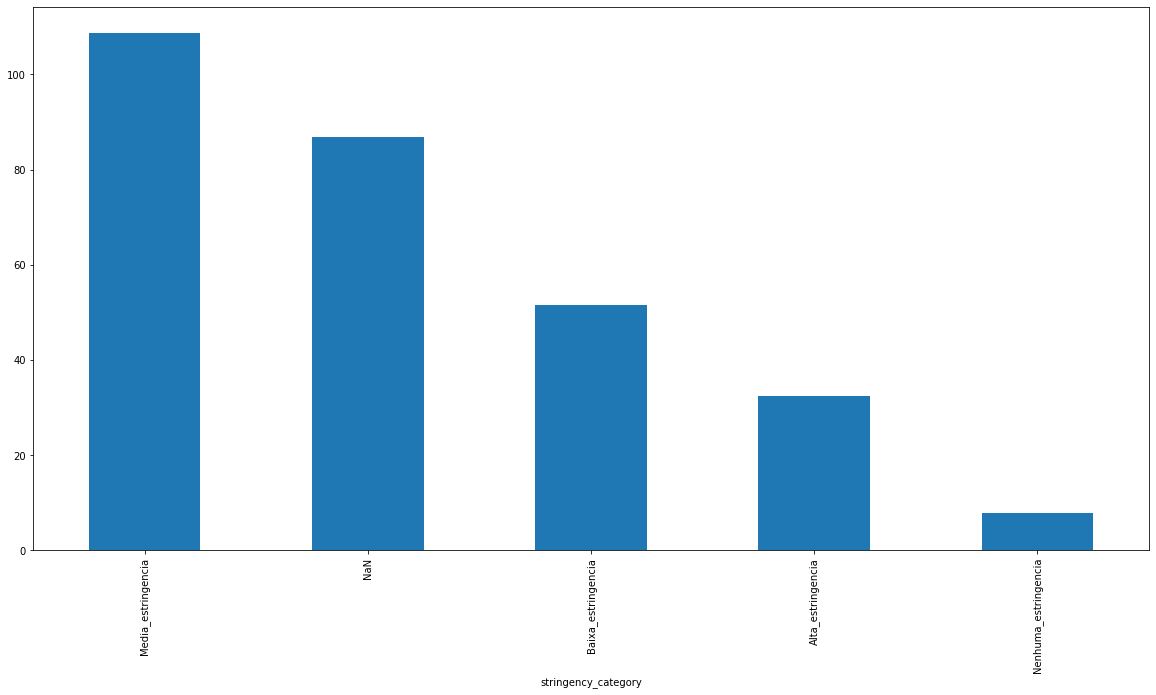

In [36]:
df.groupby(['stringency_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

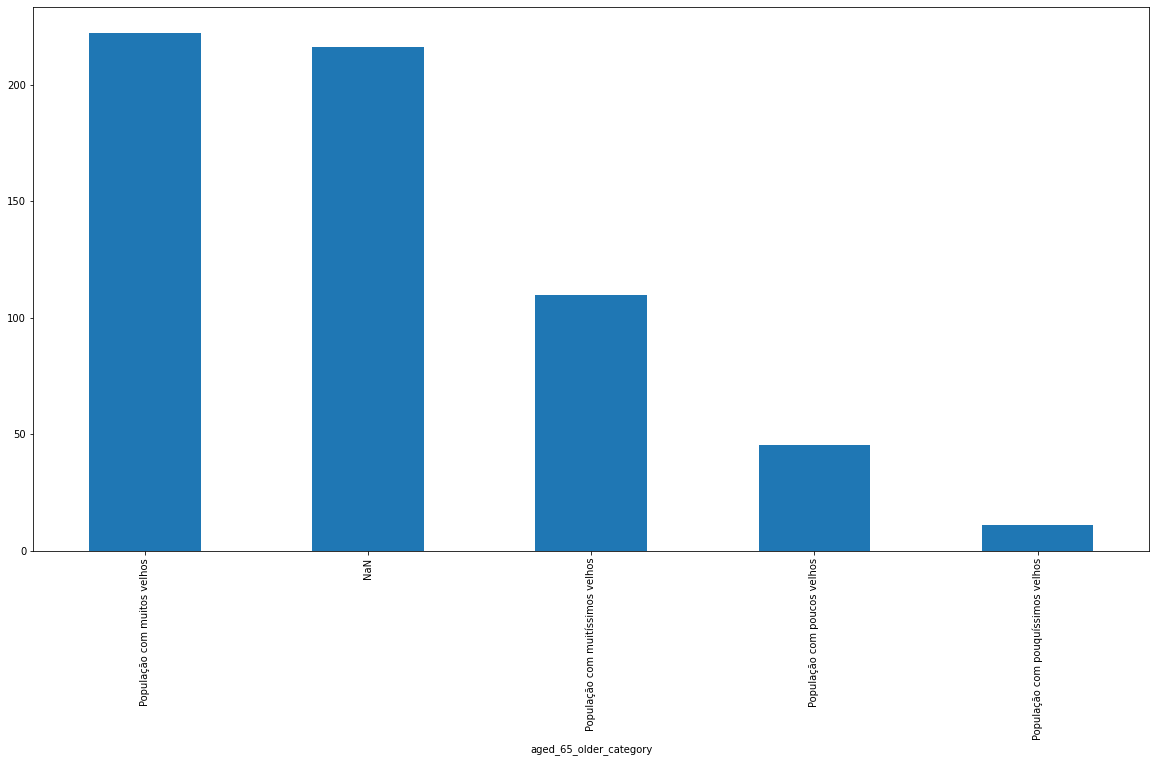

In [75]:
df.groupby(['aged_65_older_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

## Estatísticas bivariadas

In [81]:
df.cov()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.648167e+13,6.800189e+10,6.936945e+10,3.647147e+11,1.351090e+09,1.269830e+09,1.865702e+10,5.433380e+07,5.592747e+07,4.957595e+08,1.344359e+06,1.367045e+06,-7.577797e+03,8.057632e+08,9.712172e+06,3.487982e+09,4.449772e+07,3.398917e+08,6.693698e+06,1.615916e+09,2.078296e+07,2.110364e+11,3.794074e+13,4.228792e+06,4.154817e+04,1.863711e+11,3.454443e+04,3957.258524,-4.969691e+07,7.795686e+14,4.651181e+14,2.401066e+14,1.421637e+13,7.572493e+12,1.154907e+07,4.851734e+06,-8.334684e+05,1.751583e+09,2.751472e+06,8.601858e+14,-4.677080e+07,9.833606e+05,4.720532e+05,3.024774e+05,3.053253e+08,-1.592956e+06,-1.378330e+07,1.486093e+05,1.551553e+05,-2.106204e+06,3.214475e+06,-1.140249e+05,7.642327e+05,1.311742e+04,6.144752e+06,2.256064e+06,2.283851e+06,4.011084e+04,4.940050e+03
new_cases,6.800189e+10,5.308754e+08,5.209998e+08,1.453069e+09,9.262802e+06,8.232500e+06,5.416482e+07,5.509997e+05,4.969463e+05,1.510597e+06,1.072829e+04,9.477916e+03,1.178944e+02,5.427931e+06,7.597581e+04,2.483791e+07,4.193368e+05,2.832373e+06,4.930985e+04,1.368130e+07,2.175752e+05,1.384778e+09,2.115984e+11,-2.250841e+05,-5.970039e+02,1.200721e+09,-6.277433e+02,132.400680,-3.703540e+05,2.563424e+12,1.371585e+12,5.695897e+11,5.675032e+10,2.964252e+10,-1.148069e+05,-8.735356e+04,-7.896776e+04,-1.824875e+06,2.226179e+04,5.230412e+12,-2.612110e+05,5.314197e+03,2.340984e+03,1.446065e+03,6.201754e+05,-7.925658e+03,-7.323225e+04,1.040016e+03,-1.123971e+02,-1.252103e+04,1.940592e+04,-8.226721e+02,3.995144e+03,6.765669e+01,4.953000e+04,1.175386e+04,1.188578e+04,2.746309e+02,1.014000e+02
new_cases_smoothed,6.936945e+10,5.209998e+08,5.207156e+08,1.464728e+09,9.147232e+06,8.356754e+06,5.571728e+07,4.967642e+05,4.979969e+05,1.542274e+06,1.015789e+04,9.701343e+03,8.055352e+01,5.579099e+06,7.931795e+04,2.537171e+07,4.335423e+05,2.660822e+06,6.691865e+04,1.452703e+07,2.752187e+05,1.399945e+09,2.149529e+11,-2.158371e+05,-6.070475e+02,1.223024e+09,-5.767228e+02,128.793687,-3.684171e+05,2.600994e+12,1.383278e+12,5.744579e+11,5.742770e+10,3.011366e+10,-1.129600e+05,-8.605132e+04,-7.898530e+04,-1.553195e+06,2.201415e+04,5.240249e+12,-2.616430e+05,5.338134e+03,2.364096e+03,1.463107e+03,6.313196e+05,-7.906617e+03,-7.368240e+04,1.049263e+03,-7.642122e+01,-1.268357e+04,1.938668e+04,-8.238662e+02,4.008003e+03,6.782414e+01,4.959108e+04,1.167930e+04,1.185161e+04,2.762167e+02,8.584760e+01
total_deaths,3.647147e+11,1.453069e+09,1.464728e+09,8.033860e+09,2.863930e+07,2.898359e+07,4.473199e+08,1.248527e+06,1.281820e+06,1.459552e+07,4.168745e+04,4.272149e+04,-1.362693e+02,1.994417e+07,1.963413e+05,9.778542e+07,1.161265e+06,6.997568e+06,8.785849e+04,4.169185e+07,2.695697e+05,2.952823e+09,5.274856e+11,-8.768324e+05,-5.262558e+03,2.641400e+09,-4.729838e+03,392.988633,-1.357498e+06,1.331980e+13,8.25289

In [ ]:
df[df.location=='Brazil'].corr(method='pearson')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000e+00,6.861831e-01,8.446046e-01,9.945353e-01,6.264124e-01,7.687388e-01,1.000000e+00,6.861832e-01,8.446046e-01,9.945353e-01,6.264122e-01,7.687376e-01,-4.912677e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.909522e-01,9.909520e-01,NaN,6.449839e-01,6.448438e-01,NaN,NaN,9.701290e-01,9.612538e-01,9.794608e-01,6.397177e-01,9.106320e-01,9.701286e-01,9.612559e-01,9.794496e-01,9.106348e-01,-1.184393e-01,NaN,-4.449587e-15,NaN,3.694819e-15,-7.001336e-16,4.449587e-15,-7.182147e-15,-5.693805e-15,7.001336e-16,-3.164505e-15,3.497052e-15,NaN,7.461787e-15,-7.001336e-16,4.449587e-15,7.971259e-01
new_cases,6.861831e-01,1.000000e+00,8.202256e-01,6.502744e-01,8.591104e-01,7.110935e-01,6.861831e-01,1.000000e+00,8.202256e-01,6.502744e-01,8.591123e-01,7.110978e-01,-4.980023e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.072123e-01,2.072119e-01,NaN,4.021719e-01,4.026709e-01,NaN,NaN,6.470141e-02,3.885682e-02,7.904713e-03,3.492964e-01,8.676893e-02,6.469059e-02,3.884774e-02,8.006578e-03,8.676341e-02,1.066763e-01,NaN,-3.421611e-15,NaN,-4.703274e-15,1.878353e-15,3.421611e-15,4.591120e-15,-3.778773e-15,-1.878353e-15,-5.121371e-15,2.334967e-15,NaN,-3.232511e-15,1.878353e-15,3.421611e-15,7.800308e-01
new_cases_smoothed,8.446046e-01,8.202256e-01,1.000000e+00,8.245163e-01,7.280436e-01,8.694729e-01,8.446046e-01,8.202256e-01,1.000000e+00,8.245163e-01,7.280433e-01,8.694759e-01,-6.307754e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.329274e-01,6.329280e-01,NaN,6.278155e-01,6.280342e-01,NaN,NaN,2.386670e-01,2.141735e-01,1.112976e-01,3.025669e-01,2.915016e-01,2.386579e-01,2.141872e-01,1.112747e-01,2.914904e-01,4.636713e-02,NaN,-9.556645e-16,NaN,-9.647965e-16,-5.016821e-17,1.116436e-15,-2.720988e-16,-5.016821e-17,-1.036495e-15,-9.647965e-16,1.036495e-15,NaN,-2.774468e-15,1.496911e-15,-5.176817e-16,7.950079e-01
total_deaths,9.945353e-01,6.502744e-01,8.245163e-01,1.000000e+00,6.197324e-01,7.536662e-01,9.945353e-01,6.502745e-01,8.245164e-01,1.000000e+00,6.197322e-01,7.536646e-01,-5.072394e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.842116e-01,9.842114e-01,NaN,6.677565e-01,6.676835e-01,NaN,NaN,9.721714e-01,9.606079e-01,9.825432e-01,6.345553e-01,9.076770e-01,9.721714e-01,9.606083e-01,9.825307e-01,9.076805e-01,-5.927827e-01,NaN,-4.539512e-15,NaN,3.864128e-16,6.526661e-15,1.764748e-15,-4.407743e-15,2.250703e-15,8.239549e-15,4.363371e-15,2.671621e-15,NaN,8.239549e-15,-2.250703e-15,-2.537958e-15,7.753398e-01
new_deaths,6.264124e-01,8.591104e-01,7.280436e-01,6.197324e-01,1.000000e+00,8.436478e-01,6.264124e-01,8.591104e-01,7.280435e-01,6.197324e-01,1.000000e+00,8.436503e-01,-3.901546e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.150923e-02,-1.150609e-02,NaN,3.344644e-01,3.348282e-01,NaN,NaN,9.668517e-02,8.514652e-02,-3.820489e-02,4.219971e-01,2.042110e-01,9.667242e-02,8.513308e-02,-3.815864e-02,2.042139e-01,-1.097593e-01,NaN,-2.477708e-15,NaN,3.224846e-15,-2.33718

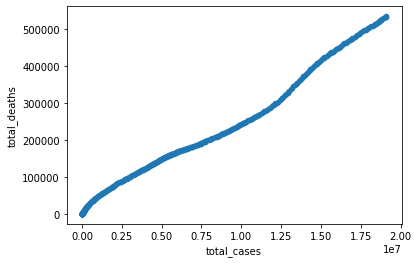

In [ ]:
df[df.location=='Brazil'].plot.scatter(x='total_cases',y='total_deaths')

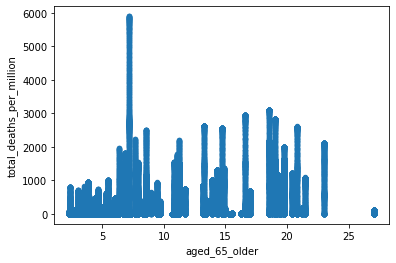

In [84]:
df.plot.scatter(x='aged_65_older',y='total_deaths_per_million')

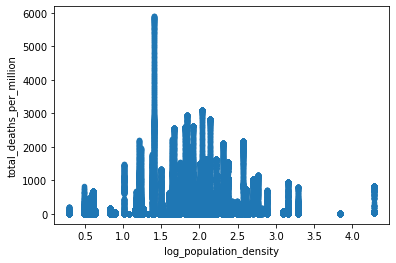

In [86]:
df.plot.scatter(x='log_population_density',y='total_deaths_per_million')

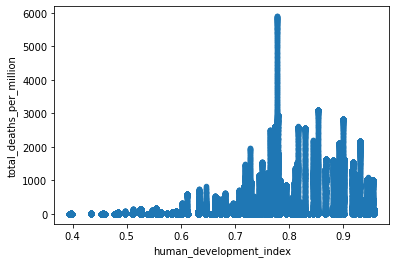

In [89]:
df.plot.scatter(x='human_development_index',y='total_deaths_per_million')

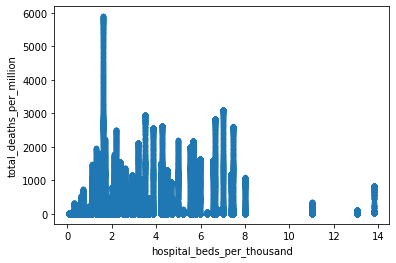

In [90]:
df.plot.scatter(x='hospital_beds_per_thousand',y='total_deaths_per_million')

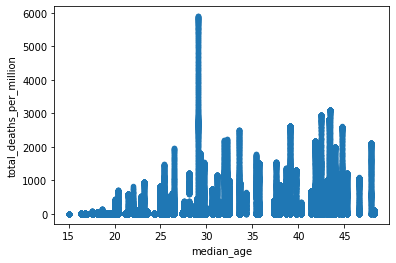

In [91]:
#median_age
df.plot.scatter(x='median_age',y='total_deaths_per_million')

# **Testes de hipótese**

Nessa etapa inicial vamos analizar, separadamente, nos anos de 2020 e 2021, no Brasil, realizando testes de hipóteses para obtermos resultados de como foi o comportamento da pandemia em cada período de tempo



In [93]:
# Transformar a coluna date no tipo data
df['date'] = pd.to_datetime(df['date'])

In [94]:
# Primeiro ano de pandemia

casos_brasil_inicio = df.loc[(df['date'].dt.year == 2020) & (df['date'].dt.month >= 2)]

casos_brasil_inicio[casos_brasil_inicio.location=='Brazil']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
12995,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.000000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12996,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.000000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12997,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.000000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12998,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91,0.301030,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12999,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.301030,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13300,BRA,South America,Brazil,2020-12-27,7484285.0,18479.0,35097.857,191139.0,344.0,625.000,35210.321,86.936,165.120,899.226,1.618,2.940,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.7

In [95]:
# Segundo ano de pandemia

casos_brasil_depois = df.loc[(df['date'].dt.year == 2021)]

casos_brasil_depois[casos_brasil_depois.location=="Brazil"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
13305,BRA,South America,Brazil,2021-01-01,7700578.0,24605.0,36002.571,195411.0,462.0,703.286,36227.886,115.756,169.377,919.324,2.174,3.309,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.886523,5.290949,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.008600
13306,BRA,South America,Brazil,2021-01-02,7716405.0,15827.0,35799.857,195725.0,314.0,704.286,36302.345,74.459,168.423,920.801,1.477,3.313,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.887415,5.291646,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.012837
13307,BRA,South America,Brazil,2021-01-03,7733746.0,17341.0,35637.286,196018.0,293.0,697.000,36383.927,81.582,167.658,922.180,1.378,3.279,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.888390,5.292296,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.021189
13308,BRA,South America,Brazil,2021-01-04,7753752.0,20006.0,35559.857,196561.0,543.0,713.000,36478.046,94.120,167.294,924.734,2.555,3.354,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.889512,5.293497,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.033424
13309,BRA,South America,Brazil,2021-01-05,7810400.0,56648.0,35264.143,197732.0,1171.0,721.571,36744.551,266.504,165.903,930.243,5.509,3.395,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.892673,5.296077,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.045323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,BRA,South America,Brazil,2021-07-09,19020499.0,57737.0,47575.71

In [96]:
casos_brasil_inicio['new_deaths_per_million'].describe()

count    37745.000000
mean         1.199661
std          3.520077
min        -76.445000
25%          0.000000
50%          0.088000
75%          0.921000
max        218.329000
Name: new_deaths_per_million, dtype: float64

In [97]:
casos_brasil_depois['new_deaths_per_million'].describe()

count    26760.000000
mean         2.008044
std          4.174916
min        -20.593000
25%          0.000000
50%          0.283000
75%          2.191250
max        104.885000
Name: new_deaths_per_million, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


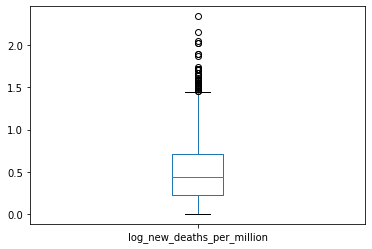

In [98]:
casos_brasil_inicio['log_new_deaths_per_million'] = casos_brasil_inicio['new_deaths_per_million'].apply(np.log10)
casos_brasil_inicio[casos_brasil_inicio['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


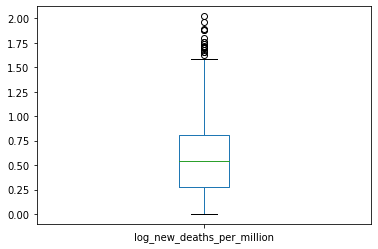

In [99]:
casos_brasil_depois['log_new_deaths_per_million'] = casos_brasil_depois['new_deaths_per_million'].apply(np.log10)
casos_brasil_depois[casos_brasil_depois['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


*   H0: O número de mortes por milhão não diminuiu em 2021

*   H1: O número de mortes por milhão diminuiu em 2021




In [100]:
stats.shapiro(casos_brasil_inicio['new_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.34480202198028564, 0.0)

In [101]:
stats.shapiro(casos_brasil_depois['new_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5199995040893555, 0.0)

Os p-values obtidos foram muito baixos, portanto, ambas amostras não seguem uma distribuição normal. Então, usaremos o teste mann-whitney para amostras não pareadas.

In [102]:
stats.mannwhitneyu(casos_brasil_inicio['new_deaths_per_million'], casos_brasil_depois['new_deaths_per_million'])

MannwhitneyuResult(statistic=597052175.5, pvalue=1.779043938193127e-120)

O p-value possue um valor menos do que o nível de significância (geralmente adotado como 0,05) portanto, ele rejeita a hipótese alternativa de que os casos novos de morte por covid diminuiram em 2021

In [104]:
strin_brasil_Hi = df.loc[(df['stringency_category'] == 'Alta_estringencia')]

strin_brasil_Hi = strin_brasil_Hi[strin_brasil_Hi.location=="Brazil"]

In [106]:
strin_brasil_Lo = df.loc[(df['stringency_category'] == 'Nenhum_estringencia') | (df['stringency_category'] == 'Baixa_estringencia')]

strin_brasil_Lo = strin_brasil_Lo[strin_brasil_Lo.location=="Brazil"]

In [107]:
strin_brasil_Lo['reproduction_rate'].describe()

count    54.000000
mean      1.177963
std       0.393889
min       0.970000
25%       1.002500
50%       1.080000
75%       1.150000
max       2.630000
Name: reproduction_rate, dtype: float64

In [108]:
strin_brasil_Hi['reproduction_rate'].describe()

count    125.000000
mean       1.328880
std        0.270042
min        1.030000
25%        1.110000
50%        1.280000
75%        1.480000
max        2.140000
Name: reproduction_rate, dtype: float64

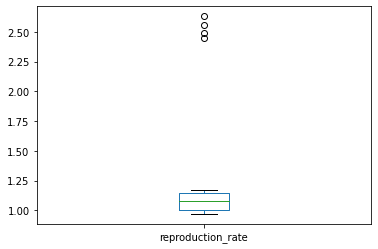

In [109]:
strin_brasil_Lo['reproduction_rate'].plot(kind='box')

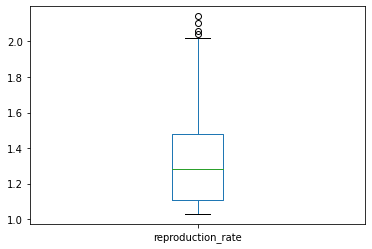

In [110]:
strin_brasil_Hi['reproduction_rate'].plot(kind='box')

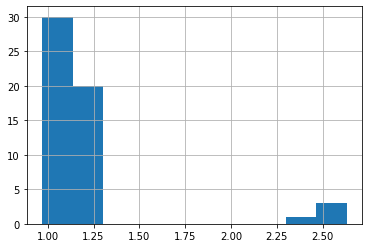

In [111]:
strin_brasil_Lo['reproduction_rate'].dropna().hist()

In [112]:
stats.jarque_bera(strin_brasil_Lo['reproduction_rate'].dropna())

(227.05336634108215, 0.0)

In [113]:
stats.shapiro(strin_brasil_Lo['reproduction_rate'].dropna())

(0.4544994831085205, 7.132766599582396e-13)

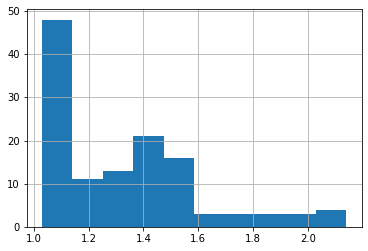

In [114]:
strin_brasil_Hi['reproduction_rate'].dropna().hist()

In [115]:
stats.shapiro(strin_brasil_Hi['reproduction_rate'].dropna())

(0.8804649710655212, 1.3343123050901795e-08)

In [116]:
stats.mannwhitneyu(strin_brasil_Lo['reproduction_rate'], strin_brasil_Hi['reproduction_rate'])

MannwhitneyuResult(statistic=1852.5, pvalue=2.1276302963946608e-07)

In [117]:
strin_brasil_Hi['new_cases_per_million'].describe()

count    125.000000
mean      95.799072
std       79.163854
min        1.520000
25%       22.234000
50%       80.570000
75%      151.431000
max      319.252000
Name: new_cases_per_million, dtype: float64

In [118]:
strin_brasil_Lo['new_cases_per_million'].dropna().describe()

count     56.000000
mean     147.522482
std      110.078231
min        0.000000
25%       65.740250
50%      130.806000
75%      181.245500
max      402.410000
Name: new_cases_per_million, dtype: float64

In [119]:
stats.shapiro(strin_brasil_Hi['new_cases_per_million'].dropna())

(0.9219449162483215, 2.0627780941140372e-06)

# **Análise exploratória dos dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101998 entries, 0 to 101997
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               101998 non-null  object        
 1   continent                              97230 non-null   object        
 2   location                               101998 non-null  object        
 3   date                                   101998 non-null  datetime64[ns]
 4   total_cases                            98192 non-null   float64       
 5   new_cases                              98189 non-null   float64       
 6   new_cases_smoothed                     97179 non-null   float64       
 7   total_deaths                           87983 non-null   float64       
 8   new_deaths                             88139 non-null   float64       
 9   new_deaths_smoothed                    97179 non

In [ ]:
df['iso_code'] = df['iso_code'].astype('category')
df['continent'] = df['continent'].astype('category')
df['location'] = df['location'].astype('category')
df['date'] = df['date'].astype('category')
df['tests_units'] = df['tests_units'].astype('category')

In [ ]:
df.dtypes

iso_code                                 category
continent                                category
location                                 category
date                                     category
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
reproduction_rate                         float64
icu_patients                              float64
icu_patients_per_million                  float64
hosp_patients                             float64


In [ ]:
df['continent'].cat.categories

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [ ]:
df['iso_code'].cat.categories

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG',
       ...
       'VEN', 'VGB', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=231)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
101993,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,107.285,136.514,3.768,2.124,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12811.0,720873.0,48.501,0.862,8053.0,0.542,0.198,5.1,tests performed,1433578.0,848808.0,584770.0,34821.0,13088.0,9.65,5.71,3.93,881.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101994,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,4377.738,180.516,119.213,140.215,3.700,2.336,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101995,ZWE,Africa,Zimbabwe,2021-07-10,66853.0,1787.0,1884.000,2126.0,42.0,38.143,4497.970,120.232,126.758,143.040,2.826,2.566,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101996,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,4559.331,61.361,127.748,147.010,3.970,2.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101997,ZWE,Africa,Zimbabwe,2021-07-12,70426.0,2661.0,2058.857,2236.0,51.0,46.429,4738.367,179.036,138.523,150.441,3.431,3.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [ ]:
df.shape

(101998, 60)

In [ ]:
df.isnull().sum()

iso_code                                      0
continent                                  4768
location                                      0
date                                          0
total_cases                                3806
new_cases                                  3809
new_cases_smoothed                         4819
total_deaths                              14015
new_deaths                                13859
new_deaths_smoothed                        4819
total_cases_per_million                    4328
new_cases_per_million                      4331
new_cases_smoothed_per_million             5336
total_deaths_per_million                  14524
new_deaths_per_million                    14368
new_deaths_smoothed_per_million            5336
reproduction_rate                         19771
icu_patients                              91741
icu_patients_per_million                  91741
hosp_patients                             89262
hosp_patients_per_million               

# **Pré processamento**

Excluir as seguintes colunas, pois possuem de 80 à 90 porcento de seus dados ausentes.

In [ ]:
df = df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                      'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million'])

In [ ]:
# Exluir do dataset colunasc que possuem ao menos 70% dos dados ausentes
df = df.dropna(thresh=0.7*len(df), axis=1)

In [ ]:
df.isnull().sum()

iso_code                               0
continent                           4768
location                               0
date                                   0
total_cases                         3806
new_cases                           3809
new_cases_smoothed                  4819
total_deaths                       14015
new_deaths                         13859
new_deaths_smoothed                 4819
total_cases_per_million             4328
new_cases_per_million               4331
new_cases_smoothed_per_million      5336
total_deaths_per_million           14524
new_deaths_per_million             14368
new_deaths_smoothed_per_million     5336
reproduction_rate                  19771
stringency_index                   16437
population                           656
population_density                  7263
median_age                         10944
aged_65_older                      11966
aged_70_older                      11447
gdp_per_capita                     10575
cardiovasc_death

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


In [ ]:
print(df['total_cases'].mean())
print(df['total_cases'].median())

1105662.5528963662
14093.0
